In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15,6)

Solve the s-wave Schrodinger equation for the ground state and the first excited state of the hydrogen atom:                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hslash^2}\left[\ V(r)-E \ \right]  }$ where $\displaystyle{V(r)=-\frac{e^2}{r}}$                     
Here, $m$ is the reduced mass of the electron. Obtain the energy eigenvalues and plot the corresponding wavefunctions.      
Remember that the ground state energy of the hydrogen atom is $-13.6 eV$.                                                
Take $e = 3.795 (eVÅ)^{1/2}, \hslash c = 1973 (eVÅ)$ and $m = 0.511\times 10^6 eV/c^2$.

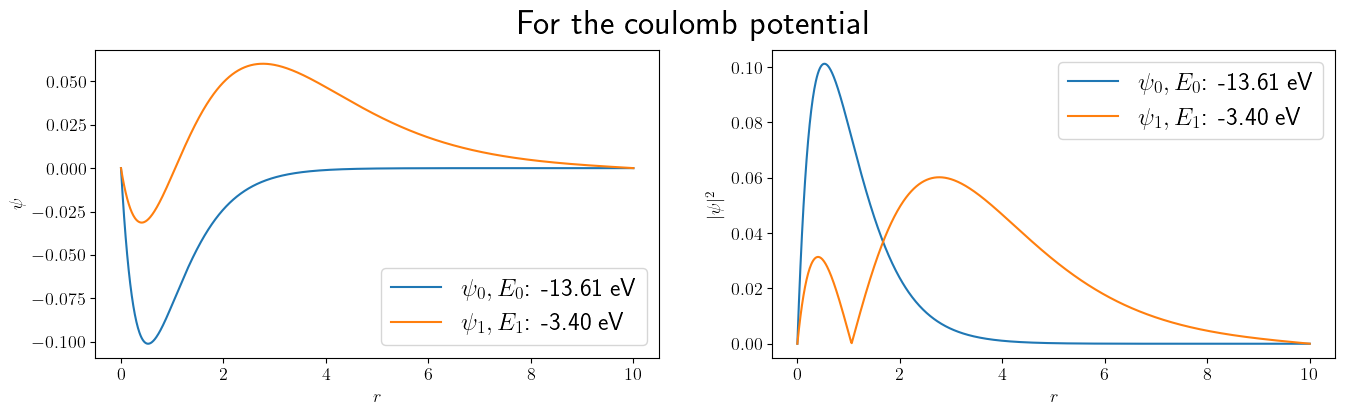

In [2]:
h = 1973
m = 0.511e6
e = 3.795
r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[1] - r[0]

V = np.zeros((n, n))
for i in range(1,n):
    V[i, i] = -e**2 / r[i]

A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
#A=np.diag([-2]*(n),0) + np.diag([1]*(n-1),-1) + np.diag([1]*(n-1),1)
H = ((-h**2) / (2 * m * dr**2)) * A + V
E, U= np.linalg.eigh(H)

fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(r,U[:,0], label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax1.plot(r,-U[:,1], label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
ax2.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax2.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
fig.suptitle('For the coulomb potential', fontsize = 25)
ax1.set_ylabel(r'$\psi$')
ax1.set_xlabel(r'$r$')
ax2.set_ylabel(r'$|\psi|^2$')
ax2.set_xlabel(r'$r$')
ax1.legend()
ax2.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for an atom :                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hslash^2}\left[\ V(r)-E \ \right]  }$                                              
where $m$ is the reduced mass of the system (which can be chosen to be the mass of an electron),                               
for the screened coulomb potential where                                                                                       
$\qquad\displaystyle{V(r)=-\frac{e^2}{r} e^{-\frac{r}{a}}}$                                                                                   
Find the energy (in $eV$) of the ground state of the atom to an accuracy of three significant digits.                            
Also, plot the corresponding wavefunction. Take $e = 3.795 (eVÅ)^{1/2}, m = 0.511\times 10^6 eV/c^2$, and $a = 3 Å, 5 Å, 7 Å$.                                                                                                                       
In these units $\hslash c = 1973 (eVÅ)$. The ground state energy is expected to be above $-12 eV$ in all three cases.                

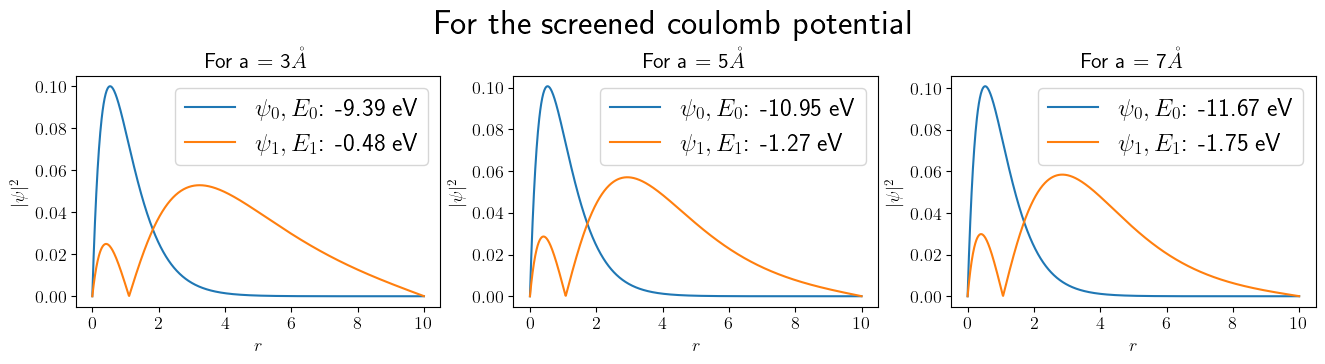

In [3]:
h = 1973
m = 0.511e6
e = 3.795
a = [ 3, 5, 7]

r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

def V(r,n,a):
    V = np.zeros((n, n))
    for i in range(1,n):
        V[i, i] = (-e**2/r[i])*np.exp(-r[i]/a)
    return V

A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
fig = plt.figure(figsize=(16,3))
fig.suptitle('For the screened coulomb potential',y=1.1, fontsize = 25)
for j in range(len(a)):
    H = (-(h**2)/ (2 * m * dr**2)) * A + V(r,n,a[j])
    E, U= np.linalg.eigh(H)
    plt.subplot(1,3,j+1)
    plt.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
    plt.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
    plt.title(f'For a = {a[j]}'+r'$\mathring{A}$')
    plt.ylabel(r'$|\psi|^2$')
    plt.xlabel(r'$r$')
    plt.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for a particle of mass $m$ :                    
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hslash^2}\left[\ V(r)-E \ \right]  }$                                              
For the anharmonic oscillator potential                                                                                       
$\qquad\displaystyle{V(r)=\frac{1}{2}kr^2+\frac{1}{3}br^3}$                                                                                   
for the ground state energy (in $MeV$) of particle to an accuracy of three significant digits.                                         
Also, plot the corresponding wave function. Choose $m = 940 MeV/c^2, k = 100 MeV fm^{-2}, b = 0, 10, 30 MeV fm^{-3}$.               
In these units, $\hslash c = 197.3 MeV fm$. The ground state energy I expected to lie between $90$ and $110 MeV$ for all three cases.

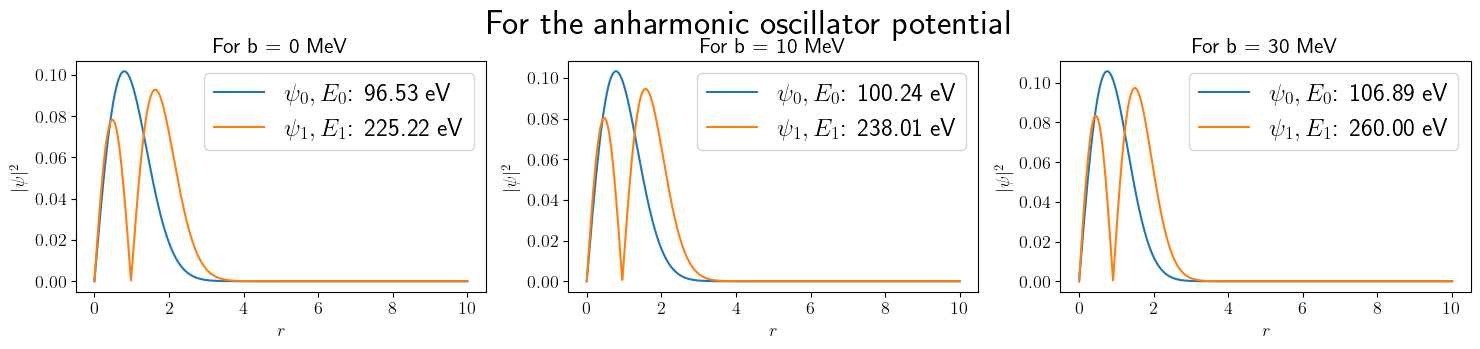

In [4]:
h = 197.3
m = 940
k = 100
b = [ 0, 10, 30]

r_min = 1e-12
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

def V(r,n,b,k):
    V = np.zeros((n, n))
    for i in range(1,n):
        V[i, i] = (k*(r[i])**2/2) + (b*(r[i])**3/3)
    return V
    
A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
fig = plt.figure(figsize=(18,3))
fig.suptitle('For the anharmonic oscillator potential',y=1.05, fontsize = 25)
for j in range(len(b)):
    H = (-(h**2) / (2 * m * dr**2)) * A + V(r,n,b[j],k)
    E, U= np.linalg.eigh(H)
    plt.subplot(1,3,j+1)
    plt.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
    plt.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
    plt.ylabel(r'$|\psi|^2$')
    plt.xlabel(r'$r$')
    plt.title(f'For b = {b[j]} MeV')
    plt.legend()
plt.show()

Solve the s-wave radial Schrodinger equation for the vibrations of hydrogen molecule :                                                                     
$ \qquad \displaystyle{\frac{d^2 y}{dr^2}= A(r)\ u(r)}$                                                                       
$ \qquad \displaystyle{A(r)=\frac{2\mu}{\hslash^2}\left[\ V(r)-E \ \right]  }$                                              
$ \qquad$ where $\mu$ is the reduced mass of the two-atom system for the Morse potential                                                     
$\qquad\displaystyle{V(r)=D(e^{-2ar'}-e^{-ar'}) , \qquad r'=\frac{r-r_o}{r}}$                                                                                   
Find the lowest vibrational energy (in $MeV$) of the molecule to an accuracy of three significant digits.                    
Also plot the corresponding wave function. Take : $m = 940\times 10^6 eV/C^2, D = 0.755501 eV, \alpha = 1.44, r_o = 0.131349 Å$

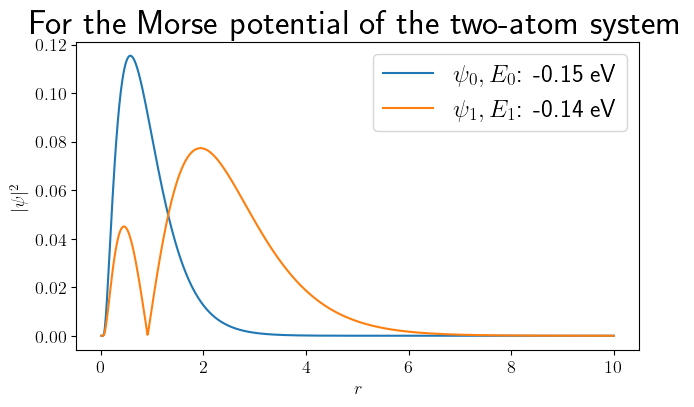

In [5]:
h = 1973
m = 940e6
D = 0.755501
a = 1.44
r_o = 0.131349

r_min = 0.01
r_max = 10
n = 1000
r = np.linspace(r_min, r_max, n)
dr = r[2] - r[1]

V = np.zeros((n, n))
for i in range(1,n):
    rp = (r[i]-r_o)/r[i]
    V[i, i] = D*(np.exp(-2*a*rp)-np.exp(-a*rp))

A = -2*np.eye(n,n)
for i in range(1,n-1):
    A[i, i+1]=1
    A[i+1, i]=1
    
H = (-(h**2) / (2 * m * dr**2)) * A + V
E, U= np.linalg.eigh(H)

fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(r,abs(U[:,0]), label=r'$\psi_0,E_0$'+f': { E[0]:.2f} eV')
ax1.plot(r,abs(U[:,1]), label=r'$\psi_1,E_1$'+f': { E[1]:.2f} eV')
ax1.set_title('For the Morse potential of the two-atom system', fontsize = 25)
ax1.set_ylabel(r'$|\psi|^2$')
ax1.set_xlabel(r'$r$')
ax1.legend()
plt.show()